## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0041953	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9844748	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9634659	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9452296	total: 61.5ms	remaining: 15.3s
4:	learn: 0.9272588	total: 62.3ms	remaining: 12.4s
5:	learn: 0.9099718	total: 63.2ms	remaining: 10.5s
6:	learn: 0.8913771	total: 64ms	remaining: 9.08s
7:	learn: 0.8743629	total: 64.9ms	remaining: 8.04s
8:	learn: 0.8580668	total: 65.6ms	remaining: 7.23s
9:	learn: 0.8408883	total: 66.5ms	remaining: 6.58s
10:	learn: 0.8240450	total: 67.2ms	remaining: 6.05s
11:	learn: 0.8086421	total: 68ms	remaining: 5.6s
12:	learn: 0.7928941	total: 68.8ms	remaining: 5.22s
13:	learn: 0.7766165	total: 69.5ms	remaining: 4.9s
14:	learn: 0.7628879	total: 70.3ms	remaining: 4.61s
15:	learn: 0.7490888	total: 71.1ms	remaining: 4.37s
16:	learn: 0.7364293	total: 71.9ms	remaining: 4.16s
17:	learn: 0.7231287	total: 72.6ms	remaining: 3.96s
18:	learn: 0.7097821	total: 73.4ms	remaining: 3.79

31:	learn: 0.5764776	total: 84.9ms	remaining: 2.57s
32:	learn: 0.5681416	total: 85.9ms	remaining: 2.52s
33:	learn: 0.5613233	total: 86.7ms	remaining: 2.46s
34:	learn: 0.5541296	total: 87.5ms	remaining: 2.41s
35:	learn: 0.5463408	total: 88.3ms	remaining: 2.37s
36:	learn: 0.5387713	total: 89.3ms	remaining: 2.32s
37:	learn: 0.5304885	total: 90.2ms	remaining: 2.28s
38:	learn: 0.5222823	total: 91.1ms	remaining: 2.24s
39:	learn: 0.5139962	total: 91.8ms	remaining: 2.2s
40:	learn: 0.5070982	total: 92.6ms	remaining: 2.17s
41:	learn: 0.5010805	total: 93.4ms	remaining: 2.13s
42:	learn: 0.4943898	total: 94.3ms	remaining: 2.1s
43:	learn: 0.4873087	total: 95.1ms	remaining: 2.07s
44:	learn: 0.4805411	total: 96.1ms	remaining: 2.04s
45:	learn: 0.4741976	total: 97.2ms	remaining: 2.02s
46:	learn: 0.4692129	total: 98ms	remaining: 1.99s
47:	learn: 0.4647119	total: 98.8ms	remaining: 1.96s
48:	learn: 0.4600114	total: 99.6ms	remaining: 1.93s
49:	learn: 0.4543769	total: 100ms	remaining: 1.91s
50:	learn: 0.4504

156:	learn: 0.2507837	total: 192ms	remaining: 1.03s
157:	learn: 0.2501208	total: 193ms	remaining: 1.03s
158:	learn: 0.2497929	total: 194ms	remaining: 1.02s
159:	learn: 0.2489870	total: 194ms	remaining: 1.02s
160:	learn: 0.2483668	total: 195ms	remaining: 1.02s
161:	learn: 0.2478960	total: 196ms	remaining: 1.01s
162:	learn: 0.2471412	total: 197ms	remaining: 1.01s
163:	learn: 0.2464028	total: 198ms	remaining: 1.01s
164:	learn: 0.2456318	total: 198ms	remaining: 1s
165:	learn: 0.2448488	total: 199ms	remaining: 1s
166:	learn: 0.2439211	total: 200ms	remaining: 998ms
167:	learn: 0.2432887	total: 201ms	remaining: 995ms
168:	learn: 0.2429215	total: 202ms	remaining: 992ms
169:	learn: 0.2420833	total: 203ms	remaining: 989ms
170:	learn: 0.2414034	total: 203ms	remaining: 986ms
171:	learn: 0.2404670	total: 204ms	remaining: 983ms
172:	learn: 0.2399543	total: 205ms	remaining: 979ms
173:	learn: 0.2393852	total: 206ms	remaining: 977ms
174:	learn: 0.2386167	total: 207ms	remaining: 974ms
175:	learn: 0.2380

258:	learn: 0.2015369	total: 276ms	remaining: 789ms
259:	learn: 0.2011757	total: 277ms	remaining: 787ms
260:	learn: 0.2007935	total: 277ms	remaining: 785ms
261:	learn: 0.2000046	total: 278ms	remaining: 783ms
262:	learn: 0.1992122	total: 279ms	remaining: 782ms
263:	learn: 0.1984435	total: 280ms	remaining: 780ms
264:	learn: 0.1979963	total: 281ms	remaining: 778ms
265:	learn: 0.1974418	total: 281ms	remaining: 776ms
266:	learn: 0.1970810	total: 282ms	remaining: 775ms
267:	learn: 0.1963925	total: 283ms	remaining: 773ms
268:	learn: 0.1961965	total: 284ms	remaining: 771ms
269:	learn: 0.1959758	total: 285ms	remaining: 770ms
270:	learn: 0.1952635	total: 286ms	remaining: 768ms
271:	learn: 0.1946471	total: 286ms	remaining: 766ms
272:	learn: 0.1941409	total: 287ms	remaining: 765ms
273:	learn: 0.1937811	total: 288ms	remaining: 763ms
274:	learn: 0.1933413	total: 289ms	remaining: 761ms
275:	learn: 0.1928017	total: 290ms	remaining: 759ms
276:	learn: 0.1926211	total: 290ms	remaining: 758ms
277:	learn: 

385:	learn: 0.1515131	total: 383ms	remaining: 609ms
386:	learn: 0.1514091	total: 383ms	remaining: 607ms
387:	learn: 0.1512309	total: 384ms	remaining: 606ms
388:	learn: 0.1509592	total: 385ms	remaining: 605ms
389:	learn: 0.1506395	total: 386ms	remaining: 604ms
390:	learn: 0.1505870	total: 387ms	remaining: 603ms
391:	learn: 0.1505184	total: 388ms	remaining: 602ms
392:	learn: 0.1502085	total: 389ms	remaining: 600ms
393:	learn: 0.1499548	total: 390ms	remaining: 599ms
394:	learn: 0.1495385	total: 390ms	remaining: 598ms
395:	learn: 0.1492888	total: 391ms	remaining: 597ms
396:	learn: 0.1491541	total: 392ms	remaining: 595ms
397:	learn: 0.1487832	total: 393ms	remaining: 594ms
398:	learn: 0.1487421	total: 394ms	remaining: 593ms
399:	learn: 0.1484576	total: 395ms	remaining: 592ms
400:	learn: 0.1482169	total: 395ms	remaining: 591ms
401:	learn: 0.1479743	total: 396ms	remaining: 589ms
402:	learn: 0.1479128	total: 397ms	remaining: 588ms
403:	learn: 0.1477399	total: 398ms	remaining: 587ms
404:	learn: 

483:	learn: 0.1325027	total: 467ms	remaining: 498ms
484:	learn: 0.1322670	total: 468ms	remaining: 497ms
485:	learn: 0.1321971	total: 468ms	remaining: 495ms
486:	learn: 0.1321568	total: 469ms	remaining: 494ms
487:	learn: 0.1319203	total: 470ms	remaining: 493ms
488:	learn: 0.1315558	total: 471ms	remaining: 492ms
489:	learn: 0.1315356	total: 472ms	remaining: 491ms
490:	learn: 0.1314352	total: 473ms	remaining: 490ms
491:	learn: 0.1312484	total: 474ms	remaining: 489ms
492:	learn: 0.1311998	total: 474ms	remaining: 488ms
493:	learn: 0.1309800	total: 475ms	remaining: 487ms
494:	learn: 0.1306709	total: 476ms	remaining: 486ms
495:	learn: 0.1303864	total: 477ms	remaining: 484ms
496:	learn: 0.1303665	total: 477ms	remaining: 483ms
497:	learn: 0.1300719	total: 478ms	remaining: 482ms
498:	learn: 0.1299456	total: 479ms	remaining: 481ms
499:	learn: 0.1297770	total: 480ms	remaining: 480ms
500:	learn: 0.1297504	total: 481ms	remaining: 479ms
501:	learn: 0.1297318	total: 482ms	remaining: 478ms
502:	learn: 

609:	learn: 0.1095235	total: 573ms	remaining: 366ms
610:	learn: 0.1095099	total: 574ms	remaining: 365ms
611:	learn: 0.1094695	total: 575ms	remaining: 364ms
612:	learn: 0.1093121	total: 576ms	remaining: 363ms
613:	learn: 0.1091250	total: 577ms	remaining: 363ms
614:	learn: 0.1089435	total: 578ms	remaining: 362ms
615:	learn: 0.1087549	total: 579ms	remaining: 361ms
616:	learn: 0.1085228	total: 579ms	remaining: 360ms
617:	learn: 0.1083350	total: 580ms	remaining: 359ms
618:	learn: 0.1081164	total: 581ms	remaining: 358ms
619:	learn: 0.1080193	total: 582ms	remaining: 357ms
620:	learn: 0.1078902	total: 583ms	remaining: 356ms
621:	learn: 0.1077160	total: 584ms	remaining: 355ms
622:	learn: 0.1074813	total: 585ms	remaining: 354ms
623:	learn: 0.1074467	total: 586ms	remaining: 353ms
624:	learn: 0.1074340	total: 587ms	remaining: 352ms
625:	learn: 0.1073999	total: 588ms	remaining: 351ms
626:	learn: 0.1072284	total: 589ms	remaining: 350ms
627:	learn: 0.1070102	total: 590ms	remaining: 349ms
628:	learn: 

702:	learn: 0.0950413	total: 657ms	remaining: 278ms
703:	learn: 0.0950158	total: 658ms	remaining: 277ms
704:	learn: 0.0949151	total: 659ms	remaining: 276ms
705:	learn: 0.0946858	total: 660ms	remaining: 275ms
706:	learn: 0.0945066	total: 660ms	remaining: 274ms
707:	learn: 0.0943856	total: 661ms	remaining: 273ms
708:	learn: 0.0942344	total: 662ms	remaining: 272ms
709:	learn: 0.0940123	total: 663ms	remaining: 271ms
710:	learn: 0.0937850	total: 664ms	remaining: 270ms
711:	learn: 0.0936561	total: 664ms	remaining: 269ms
712:	learn: 0.0936340	total: 665ms	remaining: 268ms
713:	learn: 0.0935264	total: 666ms	remaining: 267ms
714:	learn: 0.0933619	total: 667ms	remaining: 266ms
715:	learn: 0.0931991	total: 668ms	remaining: 265ms
716:	learn: 0.0931384	total: 668ms	remaining: 264ms
717:	learn: 0.0931237	total: 669ms	remaining: 263ms
718:	learn: 0.0929361	total: 670ms	remaining: 262ms
719:	learn: 0.0928272	total: 671ms	remaining: 261ms
720:	learn: 0.0927189	total: 672ms	remaining: 260ms
721:	learn: 

830:	learn: 0.0799633	total: 763ms	remaining: 155ms
831:	learn: 0.0798811	total: 764ms	remaining: 154ms
832:	learn: 0.0797788	total: 765ms	remaining: 153ms
833:	learn: 0.0796602	total: 766ms	remaining: 152ms
834:	learn: 0.0795853	total: 767ms	remaining: 151ms
835:	learn: 0.0794743	total: 767ms	remaining: 151ms
836:	learn: 0.0792969	total: 768ms	remaining: 150ms
837:	learn: 0.0792117	total: 769ms	remaining: 149ms
838:	learn: 0.0791947	total: 770ms	remaining: 148ms
839:	learn: 0.0790988	total: 771ms	remaining: 147ms
840:	learn: 0.0790406	total: 772ms	remaining: 146ms
841:	learn: 0.0789964	total: 773ms	remaining: 145ms
842:	learn: 0.0788245	total: 773ms	remaining: 144ms
843:	learn: 0.0787341	total: 774ms	remaining: 143ms
844:	learn: 0.0785846	total: 775ms	remaining: 142ms
845:	learn: 0.0784990	total: 776ms	remaining: 141ms
846:	learn: 0.0783928	total: 777ms	remaining: 140ms
847:	learn: 0.0783142	total: 778ms	remaining: 139ms
848:	learn: 0.0782690	total: 779ms	remaining: 138ms
849:	learn: 

928:	learn: 0.0702728	total: 847ms	remaining: 64.7ms
929:	learn: 0.0701936	total: 848ms	remaining: 63.8ms
930:	learn: 0.0701077	total: 848ms	remaining: 62.9ms
931:	learn: 0.0700682	total: 849ms	remaining: 62ms
932:	learn: 0.0699250	total: 850ms	remaining: 61ms
933:	learn: 0.0698853	total: 851ms	remaining: 60.1ms
934:	learn: 0.0698471	total: 852ms	remaining: 59.2ms
935:	learn: 0.0697993	total: 853ms	remaining: 58.3ms
936:	learn: 0.0696964	total: 853ms	remaining: 57.4ms
937:	learn: 0.0695339	total: 854ms	remaining: 56.5ms
938:	learn: 0.0695260	total: 855ms	remaining: 55.6ms
939:	learn: 0.0694035	total: 856ms	remaining: 54.6ms
940:	learn: 0.0693187	total: 857ms	remaining: 53.7ms
941:	learn: 0.0692558	total: 858ms	remaining: 52.8ms
942:	learn: 0.0691280	total: 858ms	remaining: 51.9ms
943:	learn: 0.0690676	total: 859ms	remaining: 51ms
944:	learn: 0.0689473	total: 860ms	remaining: 50ms
945:	learn: 0.0687907	total: 861ms	remaining: 49.1ms
946:	learn: 0.0687683	total: 862ms	remaining: 48.2ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

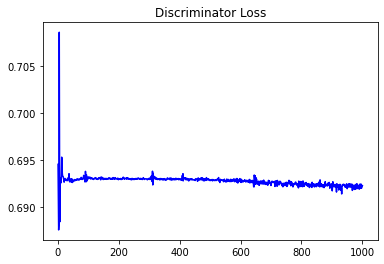

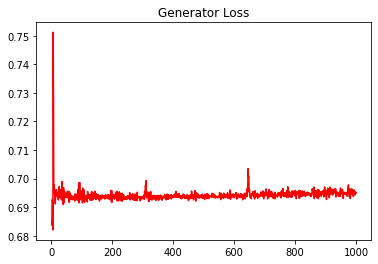

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22377690176464682


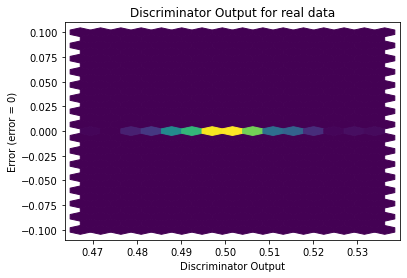

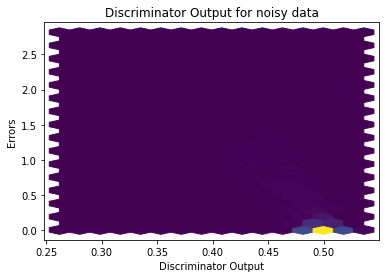

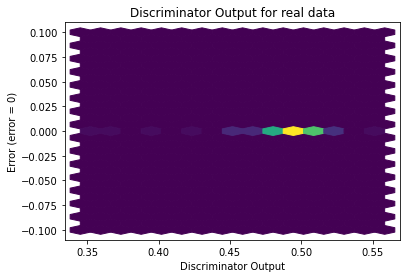

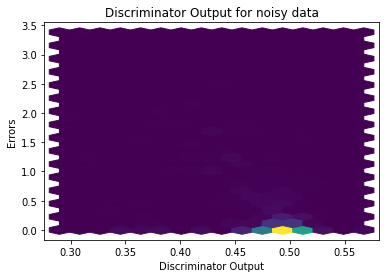

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


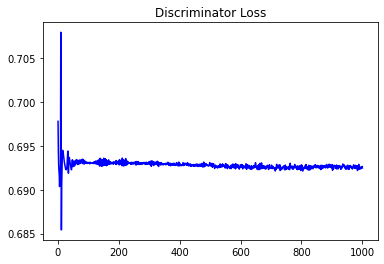

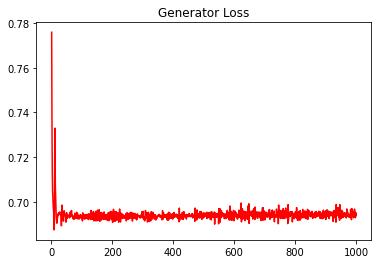

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18382742174022762


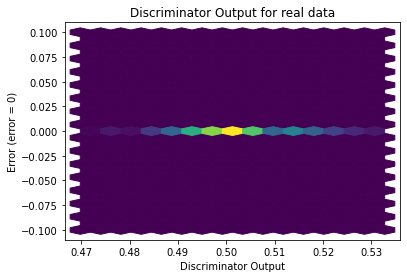

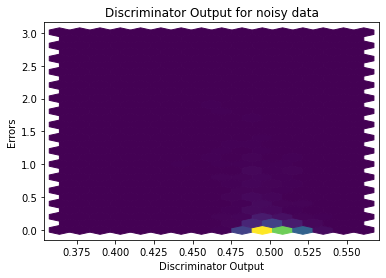

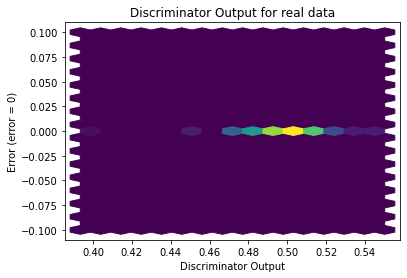

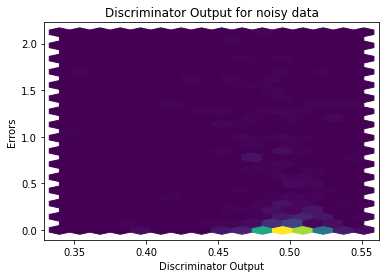

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3852]], requires_grad=True)
